# 4 OPCIONAL: Aplicación de otros algoritmos

## Descarga de los algoritmos

In [1]:
!pip install kmodes
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=a6c3deba5858e4f803a4aa270eeb85d02c78088fe0a9d7a547e8852beeae12c6
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


## Importación de las librerias necesarias

In [2]:
import hdbscan
import pandas as pd
from sklearn.datasets import make_blobs
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura del archivo de dataset

In [3]:
df = pd.read_csv('/content/sample_data/Tourists_data.csv')

## 4.1 Preprocesado

### Eliminamos los valores

Se eliminan los valores que se nos ha dicho que se pueden descartar y los valores nulos

In [4]:
df = df.drop(columns=['A0', 'A0_1', 'A0_7', 'factoregatur'])
df =  df.dropna()

## 4.2 HDBSCAN
Correspondiente con:

- **Tarea 5.1**: Emplea otros algoritmos como HDBScan y compara con otros algoritmos su rendimiento.

Se hace undersampling para que se pueda ejecutar en el entorno

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

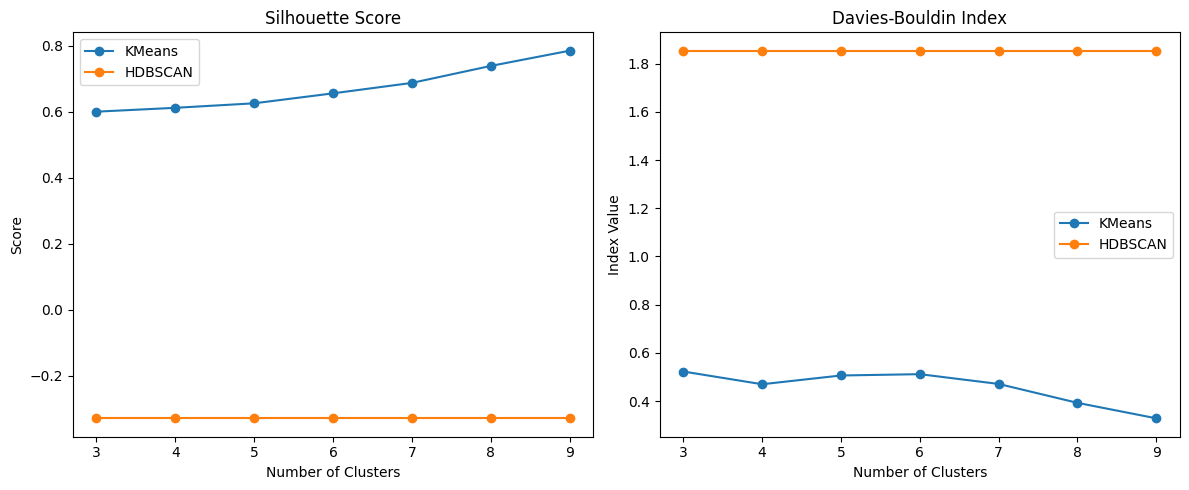

In [5]:
X=df.copy().sample(frac=0.1, random_state=1)
# Diferentes valores de clusters a probar
clusters_range = range(3, 10)
kmeans_scores_silhouette = []
kmeans_scores_davies_bouldin = []
hdbscan_scores_silhouette = []
hdbscan_scores_davies_bouldin = []

# Comparar rendimiento para diferentes valores de clusters
for n_clusters in clusters_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_pred = kmeans.fit_predict(X)
    kmeans_scores_silhouette.append(silhouette_score(X, kmeans_pred))
    kmeans_scores_davies_bouldin.append(davies_bouldin_score(X, kmeans_pred))

    # HDBSCAN
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=100, gen_min_span_tree= True ,min_samples=5)
    hdbscan_pred = hdbscan_clusterer.fit_predict(X)
    hdbscan_scores_silhouette.append(silhouette_score(X, hdbscan_pred))
    hdbscan_scores_davies_bouldin.append(davies_bouldin_score(X, hdbscan_pred))

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(clusters_range, kmeans_scores_silhouette, marker='o', label='KMeans')
plt.plot(clusters_range, hdbscan_scores_silhouette, marker='o', label='HDBSCAN')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clusters_range, kmeans_scores_davies_bouldin, marker='o', label='KMeans')
plt.plot(clusters_range, hdbscan_scores_davies_bouldin, marker='o', label='HDBSCAN')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Index Value')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar los resultados de HDBSCAN son malos, esto puede ser por el dataset o por la configuración de las métricas del algoritmo.

## 4.3 Kmodes
Correspondiente con:
- **Tarea 5.2**: Emplea otros algoritmos como K-modes y compara con otros algoritmos su rendimiento.

In [6]:
X=df.copy().sample(frac=0.1, random_state=1)
# Lista de valores de clusters a probar
num_clusters = [2, 3, 4, 5]

# Algoritmo KMeans
kmeans_scores = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    kmeans_scores.append({
        'Clusters': n,
        'Silhouette Score': silhouette_score(X, kmeans.labels_),
        'Davies Bouldin Score': davies_bouldin_score(X, kmeans.labels_)
    })

# Algoritmo KModes
kmodes_scores = []
for n in num_clusters:
    km = KModes(n_clusters=n)
    km.fit(X)
    kmodes_scores.append({
        'Clusters': n,
        'Silhouette Score': silhouette_score(X, km.labels_),
        'Davies Bouldin Score': davies_bouldin_score(X, km.labels_)
    })

# Convertir resultados a DataFrames para su visualización
kmeans_scores_df = pd.DataFrame(kmeans_scores)
kmodes_scores_df = pd.DataFrame(kmodes_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


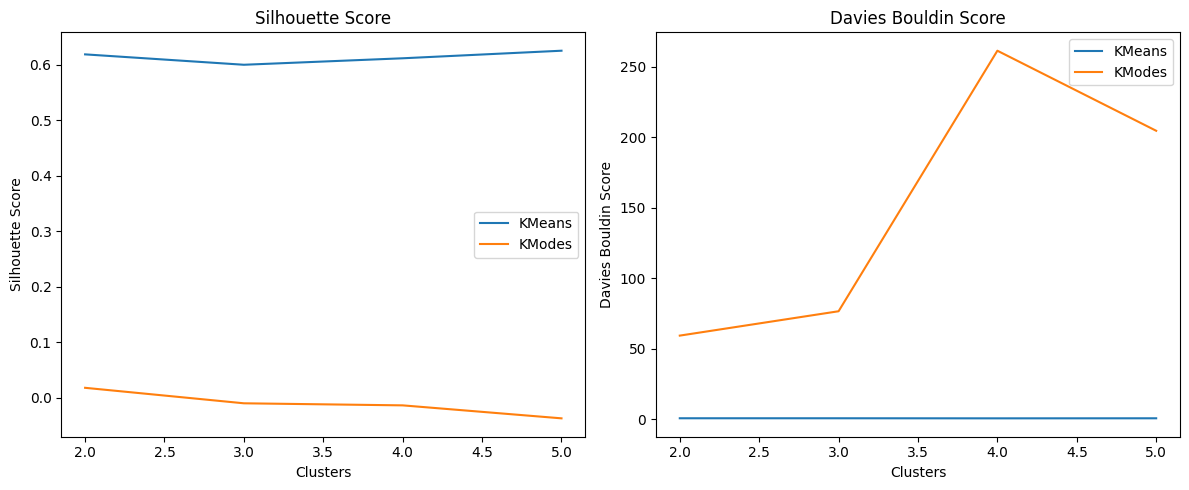

In [7]:
# Graficar los resultados
plt.figure(figsize=(12, 5))

# Silhouette Score
plt.subplot(1, 2, 1)
sns.lineplot(data=kmeans_scores_df, x='Clusters', y='Silhouette Score', label='KMeans')
sns.lineplot(data=kmodes_scores_df, x='Clusters', y='Silhouette Score', label='KModes')
plt.title('Silhouette Score')

# Davies Bouldin Score
plt.subplot(1, 2, 2)
sns.lineplot(data=kmeans_scores_df, x='Clusters', y='Davies Bouldin Score', label='KMeans')
sns.lineplot(data=kmodes_scores_df, x='Clusters', y='Davies Bouldin Score', label='KModes')
plt.title('Davies Bouldin Score')

plt.tight_layout()
plt.show()

Como se puede observar el algorítmo Kmodes obtiene peores resultados,pero mejora los resultados del HDBSCAN. El principal motivo puede ser por el número de clusters ya que como se ve en la gráfica va descendiendo a partir de 4 el índice de Davies-Bouldin